# Unsupervised Learning Capstone DRAFT

Unsupervised Learning in Data Science models the complexity of datasets with no well defined target variable and attempts to learn about the associations between datasets. More exploratory than predicitive and less concerned about  the distinctions of inputs and outputs or even exploratory and dependent variables, we delve into the clustering of the financial markets. 

Interest Rates, Foreign Exchange and Stock Markets comprise the dataset as each element represents a spot rate referring to an immediate exchange between financial parties in a single trading day.  The Yield Curve Rates of 1 month, 3 month and 6 month are the rate of return for that particular business day in the interest rate markets in the United States.  Next, the currency pairs of Euro, British Pound Sterling and the Japanese Yen against U.S. Dollar with some adjustments.  The former two are quoted in U.S. Dollars, while the reciprocal of the Japanese Yen was taken as all three were calculated a daily rate of return in U.S. Dollars.  Lastly, the U.S. Dollar quoted stock markets, popular by trading volume, are the U.S. Standard and Poor's 500 Index, the U.K. Financial Times Stock Exchange 100 Index and the Japanese Nikkei 225 with each of their daily rates of returns calculated.

We begin by importing and setting up the variables for analysis of 3 variables in each Interest Rates, Foreign Exchange and Equity Markets.  Exploratory Data Analysis follows and then an Elbow Method to uncover the number of clusters.  Clustering Algorithms proceed . . . (MORE TEXT REQUIRED)  

# Importing and Setting Up 

In [1]:
# Required imports
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Import for Clustering Evaluation and Preprocessing 
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.preprocessing import normalize

# Model imports for Clustering Algorithms
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Load the file for analysis and view columns

df = pd.read_csv('/Users/lacivert/4/Yld_FX_Eq.csv')

dfyields = pd.DataFrame(df)

list(dfyields.columns.values)

['Date',
 'US1mo',
 'US3mo',
 'US6mo',
 'EURUSD',
 'JPYUSD',
 'GBPUSD',
 'SP500',
 'NIKKEI225',
 'FTSE100']

In [3]:
# Clean up missing values 
dfyields.dropna(how='any', inplace=True)

# Descriptive Statistics
dfyields.describe()

,US1mo,US3mo,US6mo,EURUSD,JPYUSD,GBPUSD,SP500,NIKKEI225,FTSE100
count,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
mean,1.213620,1.271972,1.388984,0.010611,-0.000036,0.001662,0.025490,0.000336,0.000117
std,1.511747,1.536750,1.568568,0.611770,0.006878,0.603868,1.160914,0.015185,0.011884
min,0.000000,0.000000,0.020000,-2.960000,-0.050000,-7.840000,-9.040000,-0.110000,-0.090000
25%,0.060000,0.080000,0.150000,-0.330000,0.000000,-0.320000,-0.440000,-0.010000,-0.010000
50%,0.520000,0.760000,0.920000,0.010000,0.000000,0.010000,0.060000,0.000000,0.000000
75%,1.740000,1.800000,1.980000,0.360000,0.000000,0.340000,0.550000,0.010000,0.010000
max,5.270000,5.190000,5.330000,4.730000,0.030000,4.530000,10.790000,0.140000,0.100000


The daily frequency dataset ranging from 31st of July 2001 to 31st of August 2018 over a 17 year continuous period plus a month. The interest rate dataset has the closest associations compared to the other 3 sets of foreign exchange and stock markets.  The U.S. 1 month, 3 month and 6 month have similar common elements expressed in the mean and similar variation around their means expressed in standard deviation.  Thereafter, the minimum, the maximum and the quartiles follow the same trend in yield curve rates.  A coupling of the Euro and U.K. Pound Sterling currencies against the U.S. Dollar have similar descriptive statistics as does the Japanese Nikkei 225 and the FTSE 100, while there is a decoupling of the the Japanese Yen against the Dollar and the U.S. Standard and Poor's Equity Index.  Altogether, the overall dataset demonstrates a hard clustering of interest rates as each element is assigned to a potential cluster, while the foreign exchange and stock market sets are a soft cluster as each element is assigned a degree of membership to a potential cluster.  Further below we will complete the cluster analysis.      

In [4]:
# the first dates

dfyields.head(3)

,Date,US1mo,US3mo,US6mo,EURUSD,JPYUSD,GBPUSD,SP500,NIKKEI225,FTSE100
0,7/31/01,3.67,3.54,3.47,0.16,0.01,-0.49,0.56,0.02,0.02
1,8/2/01,3.65,3.53,3.46,0.23,-0.01,-0.24,0.40,0.04,0.01
2,8/3/01,3.63,3.52,3.47,0.34,0.00,-0.19,-0.52,-0.01,-0.01


In [5]:
# The last dates
dfyields.tail(3)

,Date,US1mo,US3mo,US6mo,EURUSD,JPYUSD,GBPUSD,SP500,NIKKEI225,FTSE100
4190,8/29/18,1.97,2.13,2.28,-0.18,0.01,0.93,0.57,0.0,-0.01
4191,8/30/18,1.97,2.11,2.28,-0.45,-0.01,-0.07,-0.44,0.0,-0.01
4192,8/31/18,1.95,2.11,2.28,-0.43,0.00,-0.25,0.01,0.0,-0.01


In [6]:
# drop the date column to keep the entire dataframe the same datatype, i.e. integers
dfylds = dfyields.drop(columns=['Date'],axis=1)

# print data types
dfylds.dtypes

US1mo        float64
US3mo        float64
US6mo        float64
EURUSD       float64
JPYUSD       float64
GBPUSD       float64
SP500        float64
NIKKEI225    float64
FTSE100      float64
dtype: object

In [7]:
# Setting up my variables

# US Fixed Income Yield Curve Spot Rates
one_month, three_month, six_month = df.loc[:,'US1mo'], df.loc[:,'US3mo'], df.loc[:,'US6mo']

# FX Spot Rates
EURUSD, JPYUSD, GBPUSD = df.loc[:,'EURUSD'], df.loc[:,'JPYUSD'], df.loc[:,'GBPUSD']

# Equity Indices
USSP500, JPNIKKEI225, UKFTSE100 = df.loc[:,'SP500'], df.loc[:,'NIKKEI225'], df.loc[:,'FTSE100']

In [8]:
list(dfylds.columns.values)

['US1mo',
 'US3mo',
 'US6mo',
 'EURUSD',
 'JPYUSD',
 'GBPUSD',
 'SP500',
 'NIKKEI225',
 'FTSE100']

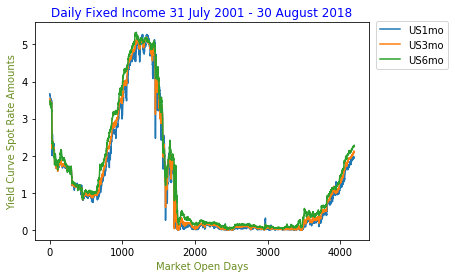

In [9]:
plt.plot (one_month)
plt.plot (three_month)
plt.plot (six_month)
plt.xlabel ('Market Open Days', color='olivedrab')
plt.ylabel ('Yield Curve Spot Rate Amounts', color='olivedrab')
plt.title ('Daily Fixed Income 31 July 2001 - 30 August 2018', color='blue')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.03)) 

Following the theme of the descriptive statistics above, the line plot shows an expected overlapping of lines across spot rates and time for the interest rates of 1 month, 3 month and 6 month yield curve rates.

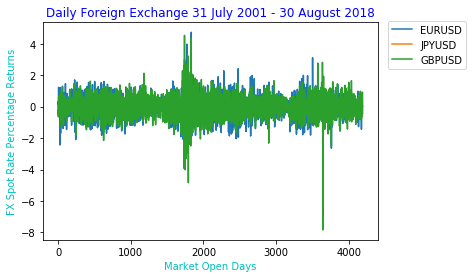

In [10]:
plt.plot (EURUSD)
plt.plot (JPYUSD)
plt.plot (GBPUSD)
plt.xlabel ('Market Open Days', color='c')
plt.ylabel ('FX Spot Rate Percentage Returns', color='c')
plt.title ('Daily Foreign Exchange 31 July 2001 - 30 August 2018', color='blue')
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03)) 

In [33]:
# different visual

Text(0.5,1,'Correlation Matrix Heatmap\nDaily Frequency of 31 July 2001 to 31 August 2018')

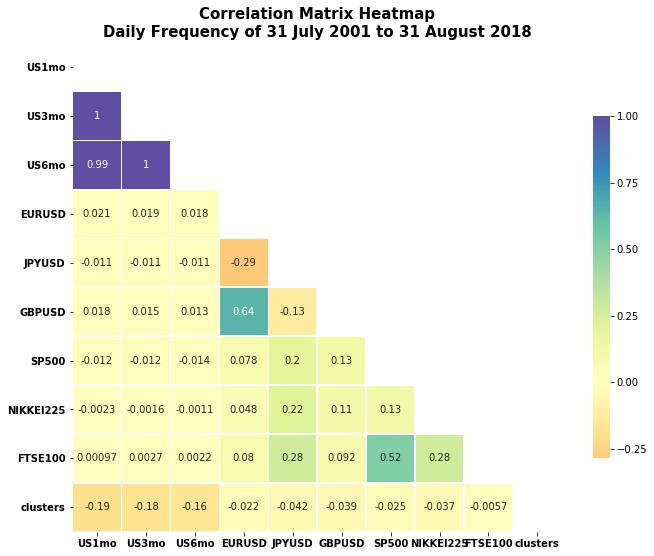

In [34]:
# Generate a correlation matrix function and assign it
corr = dfylds.corr()

# Generate an upper triangle mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask, correct aspect ratio and Spectral color theme
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=1.0, center=0, annot_kws={"size": 10}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

# Make it readable and nice
plt.yticks(rotation=0, fontweight='bold', fontsize=10)
plt.xticks(fontweight='bold', fontsize=10)
plt.title('Correlation Matrix Heatmap\nDaily Frequency of 31 July 2001 to 31 August 2018'
          , fontweight='bold', fontsize=15,color='k')

The Yield Curve Rates have near perfect positive correlation of 1 with the color purple, while the GBP / USD and EUR / USD exchange rates have a less than perfect positive correlation of 0.64 in green as does the equity indices of the FTSE 100 and the S&P 500 with 0.52 so altogether these are variables moving in tandem.  Thereafter the rest of variables have do not have a relationship as their correlations is near zero.  Also, there is no perfectly negative correlation of negative one as a single variable moves in the opposite direction of another.

In terms of clustering, the Yield Curve Rates are Hard Clustering because all datapoints are assigned, while other the assignment of the variables vary in association to Soft Clustering.   

# Cluster Number Determination and Evaluation

Before we begin on the clustering algorithms, let's determine the optimal number of cluster in our dataset.

# The Elbow Method

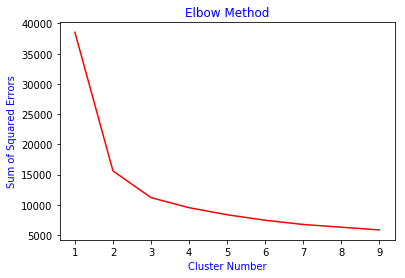

In [13]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=10000).fit(dfylds)
    dfylds["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color="red")
plt.xlabel("Cluster Number", color="blue")
plt.ylabel("Sum of Squared Errors", color="blue")
plt.title("Elbow Method", color="blue")
plt.show()

The elbow method reveals a cluster number of 3 before the curve flattens horizontally.  Specifically, the sum squared errors falls in number on the vertical axis as the number of clusters increases on the horizontal axis reaching the number datapoints in the dataset of 4,193 in the aforementioned, dfyields.describe( ) further above.     

# First Clustering Algorithm:  K - Means

An iterative algorithm that processes each datapoint to minimize the sum of squared differences similar to supervised learning with regression is the K - Means Clustering Algoritm.  The minimizing cost function is inertia that attempts to chose the means or centroids with a parameter as the number of clusters and is scalable, works well with flat geometry and smaller sets of clusters.  



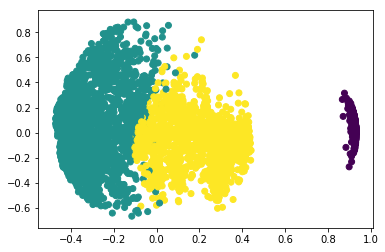

In [15]:
# K-Means begins by normalization of the data
X_norm = normalize(dfylds)

# Reduce it to 10 maturity points instead of 11 . . . maybe change 10 to 2?
X_pca = PCA(9).fit_transform(X_norm)

# Calculate predicted values . . . change random state to 100?
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution . . . how does one interpret the blobs below?
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [16]:
# Commentary on K - Means results

# Second Clustering Algorithm:  Means Shift

The next algorithm changes the methodology to a parameter bandwith from zero to one, taking away scalability with the no presumption of the data or the number of clusters.  More importantly, we move from flat to non - flat geometry or from the plane geometry of a two dimensional plane, i.e. flat surfaces to spherical geometry.   


In [35]:
# Set the bandwidth
bandwidth = estimate_bandwidth(dfylds, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(dfylds)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 6


The Means Shift Clustering Algorithm doubles the number of clusters from the Elbow Method to 6.

# Third Clustering Algorithm:  Spectral 

Staying with non-flat geometry, but changing the parameters and scalability relative to the number of clusters is the Spectral Clustering Algorithm.


In [36]:
# Three clusters of 3 in Fixed Income, 3 in FX and 3 in Equity, also from the Elbow Method
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(dfylds)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

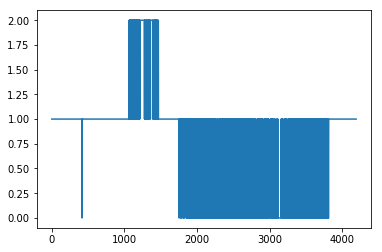

In [37]:
#Predicted clusters . . . Need to look into this
predict=sc.fit_predict(dfylds)

predict

plt.plot (predict)

# Fourth Clustering Algorithm:  Affinity Propagation

Like Mean - Shift, the Affinity Propagation is not scalable with non - flat geometry, but with parameter dampening and preference. 

Done
Estimated number of clusters: 77


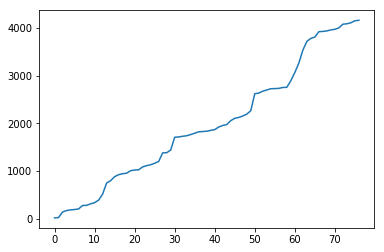

In [38]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(dfylds)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.plot (cluster_centers_indices)

# In Conclusion